In [16]:
# EDA 사전 세팅
%matplotlib inline

import os
from functools import reduce
import matplotlib as mpl
import matplotlib.pyplot as plt
import matplotlib.font_manager as fm
import pandas as pd
import numpy as np
pd.set_option('display.max_columns', None) ## 모든 열을 출력한다.
import seaborn as sns  #데이터 시각화 
from sklearn import preprocessing
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import OneHotEncoder
sns.set(font="AppleGothic", 

        rc={"axes.unicode_minus":False},

        style='darkgrid')

In [2]:
train = pd.read_csv("/Users/choejeehyuk/DNA/재벌집 막내 조/train_df.csv")
train.head(5)

,Unnamed: 0.1,Unnamed: 0,gender,car,reality,child_num,income_total,income_type,edu_type,family_type,house_type,DAYS_BIRTH,DAYS_EMPLOYED,work_phone,phone,email,occyp_type,family_size,begin_month,credit,new_age,근속연수,근속월수,임용 월,임용 주,고용전 날 수,고용비율,인당 평균 부양비,연봉,자녀 제외 가족 구성원 수
0,0,0,F,N,N,0,202500.0,Commercial associate,Higher education,Married,Municipal apartment,13899,4709,0,0,0,NaN,2.0,6.0,1.0,38,12,156,0.0,0.0,9190,0.338801,101250.0,16875.0,2.0
1,1,1,F,N,Y,1,247500.0,Commercial associate,Secondary / secondary special,Civil marriage,House / apartment,11380,1540,0,0,1,Laborers,3.0,5.0,1.0,31,4,51,3.0,0.0,9840,0.135325,82500.0,61875.0,2.0
2,2,2,M,Y,Y,0,450000.0,Working,Higher education,Married,House / apartment,19087,4434,0,1,0,Managers,2.0,22.0,2.0,52,12,147,3.0,1.0,14653,0.232305,225000.0,37500.0,2.0
3,3,3,F,N,Y,0,202500.0,Commercial associate,Secondary / secondary special,Married,House / apartment,15088,2092,0,1,0,Sales staff,2.0,37.0,0.0,41,5,69,9.0,2.0,12996,0.138653,101250.0,40500.0,2.0
4,4,4,F,Y,Y,0,157500.0,State servant,Higher education,Married,House / apartment,15037,2105,0,0,0,Managers,2.0,26.0,2.0,41,5,70,10.0,0.0,12932,0.139988,78750.0,31500.0,2.0


In [3]:
train.drop(['Unnamed: 0.1'], axis=1, inplace=True)
train.drop(['Unnamed: 0'], axis=1, inplace=True)

In [4]:
train = train.replace({'연봉' : np.inf}, 0) 

In [5]:
train.head(10)

,gender,car,reality,child_num,income_total,income_type,edu_type,family_type,house_type,DAYS_BIRTH,DAYS_EMPLOYED,work_phone,phone,email,occyp_type,family_size,begin_month,credit,new_age,근속연수,근속월수,임용 월,임용 주,고용전 날 수,고용비율,인당 평균 부양비,연봉,자녀 제외 가족 구성원 수
0,F,N,N,0,202500.0,Commercial associate,Higher education,Married,Municipal apartment,13899,4709,0,0,0,NaN,2.0,6.0,1.0,38,12,156,0.0,0.0,9190,0.338801,101250.0,16875.000000,2.0
1,F,N,Y,1,247500.0,Commercial associate,Secondary / secondary special,Civil marriage,House / apartment,11380,1540,0,0,1,Laborers,3.0,5.0,1.0,31,4,51,3.0,0.0,9840,0.135325,82500.0,61875.000000,2.0
2,M,Y,Y,0,450000.0,Working,Higher education,Married,House / apartment,19087,4434,0,1,0,Managers,2.0,22.0,2.0,52,12,147,3.0,1.0,14653,0.232305,225000.0,37500.000000,2.0
3,F,N,Y,0,202500.0,Commercial associate,Secondary / secondary special,Married,House / apartment,15088,2092,0,1,0,Sales staff,2.0,37.0,0.0,41,5,69,9.0,2.0,12996,0.138653,101250.0,40500.000000,2.0
4,F,Y,Y,0,157500.0,State servant,Higher education,Married,House / apartment,15037,2105,0,0,0,Managers,2.0,26.0,2.0,41,5,70,10.0,0.0,12932,0.139988,78750.0,31500.000000,2.0
5,F,N,Y,2,270000.0,Working,Secondary / secondary special,Married,House / apartment,13413,4996,0,0,1,High skill tech staff,4.0,18.0,1.0,37,13,166,10.0,1.0,8417,0.372474,67500.0,20769.230769,2.0
6,F,N,N,0,315000.0,Working,Secondary / secondary special,Separated,House / apartment,17570,1978,0,0,1,Core staff,1.0,41.0,2.0,48,5,65,5.0,2.0,15592,0.112578,315000.0,63000.000000,1.0
7,M,N,Y,0,270000.0,Commercial associate,Secondary / secondary special,Married,House / apartment,14896,5420,0,0,1,Drivers,2.0,53.0,0.0,41,14,180,0.0,2.0,9476,0.363856,135000.0,19285.714286,2.0
8,M,Y,Y,1,180000.0,Commercial associate,Higher education,Married,House / apartment,15131,1466,0,0,1,NaN,3.0,38.0,2.0,41,4,48,0.0,1.0,13665,0.096887,60000.0,45000.000000,2.0
9,F,N,Y,0,103500.0,Working,Secondary / secondary special,Married,House / apartment,15785,1308,0,0,0,Medicine staff,2.0,5.0,2.0,43,3,43,7.0,2.0,14477,0.082863,51750.0,34500.000000,2.0


In [6]:
def list_sep (data):
  cat_list = []
  int_list = []
  for i in data.columns:
    if data[i].dtypes == 'O':
      cat_list.append(i)
    else :
      int_list.append(i)

  return int_list, cat_list

In [7]:
int_list, cat_list = list_sep(train)
print('int : ',int_list)
print('cat : ',cat_list)

int :  ['child_num', 'income_total', 'DAYS_BIRTH', 'DAYS_EMPLOYED', 'work_phone', 'phone', 'email', 'family_size', 'begin_month', 'credit', 'new_age', '근속연수', '근속월수', '임용 월', '임용 주', '고용전 날 수', '고용비율', '인당 평균 부양비', '연봉', '자녀 제외 가족 구성원 수']
cat :  ['gender', 'car', 'reality', 'income_type', 'edu_type', 'family_type', 'house_type', 'occyp_type']


In [8]:
int_train = train[int_list]

In [10]:
int_train.drop(['work_phone', 'phone', 'email', 'credit', '자녀 제외 가족 구성원 수', '임용 월', '임용 주', 'family_size'], axis = 1, inplace = True)
int_train.head(5)

/var/folders/fs/kl20xgn54d3bgs5lpqcv3b_00000gn/T/ipykernel_3565/2327547152.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  int_train.drop(['work_phone', 'phone', 'email', 'credit', '자녀 제외 가족 구성원 수', '임용 월', '임용 주', 'family_size'], axis = 1, inplace = True)


,child_num,income_total,DAYS_BIRTH,DAYS_EMPLOYED,begin_month,new_age,근속연수,근속월수,고용전 날 수,고용비율,인당 평균 부양비,연봉
0,0,202500.0,13899,4709,6.0,38,12,156,9190,0.338801,101250.0,16875.0
1,1,247500.0,11380,1540,5.0,31,4,51,9840,0.135325,82500.0,61875.0
2,0,450000.0,19087,4434,22.0,52,12,147,14653,0.232305,225000.0,37500.0
3,0,202500.0,15088,2092,37.0,41,5,69,12996,0.138653,101250.0,40500.0
4,0,157500.0,15037,2105,26.0,41,5,70,12932,0.139988,78750.0,31500.0


In [11]:
int_train.corr()

,child_num,income_total,DAYS_BIRTH,DAYS_EMPLOYED,begin_month,new_age,근속연수,근속월수,고용전 날 수,고용비율,인당 평균 부양비,연봉
child_num,1.000000,0.033442,-0.343928,0.045393,0.007353,-0.343910,0.039223,0.044864,-0.319100,0.124783,-0.346738,0.072721
income_total,0.033442,1.000000,-0.064220,0.086901,0.017993,-0.063855,0.082570,0.086572,-0.097788,0.090107,0.718214,0.384841
DAYS_BIRTH,-0.343928,-0.064220,1.000000,-0.020250,0.057237,0.999677,-0.002727,-0.018844,0.873382,-0.213671,0.072727,-0.263951
DAYS_EMPLOYED,0.045393,0.086901,-0.020250,1.000000,0.082692,-0.020113,0.998838,0.999992,-0.504621,0.959266,0.028873,-0.215885
begin_month,0.007353,0.017993,0.057237,0.082692,1.000000,0.057110,0.083362,0.082768,0.009143,0.076298,-0.009633,-0.044789
new_age,-0.343910,-0.063855,0.999677,-0.020113,0.057110,1.000000,-0.002611,-0.018706,0.873037,-0.213444,0.072754,-0.263381
근속연수,0.039223,0.082570,-0.002727,0.998838,0.083362,-0.002611,1.000000,0.998883,-0.488924,0.956267,0.028547,-0.227128
근속월수,0.044864,0.086572,-0.018844,0.999992,0.082768,-0.018706,0.998883,1.000000,-0.503404,0.959108,0.028849,-0.216921
고용전 날 수,-0.319100,-0.097788,0.873382,-0.504621,0.009143,0.873037,-0.488924,-0.503404,1.000000,-0.651801,0.048736,-0.122761
고용비율,0.124783,0.090107,-0.213671,0.959266,0.076298,-0.213444,0.956267,0.959108,-0.651801,1.000000,0.000340,-0.207508


<AxesSubplot:title={'center':'피어슨 상관계수 히트맵'}>

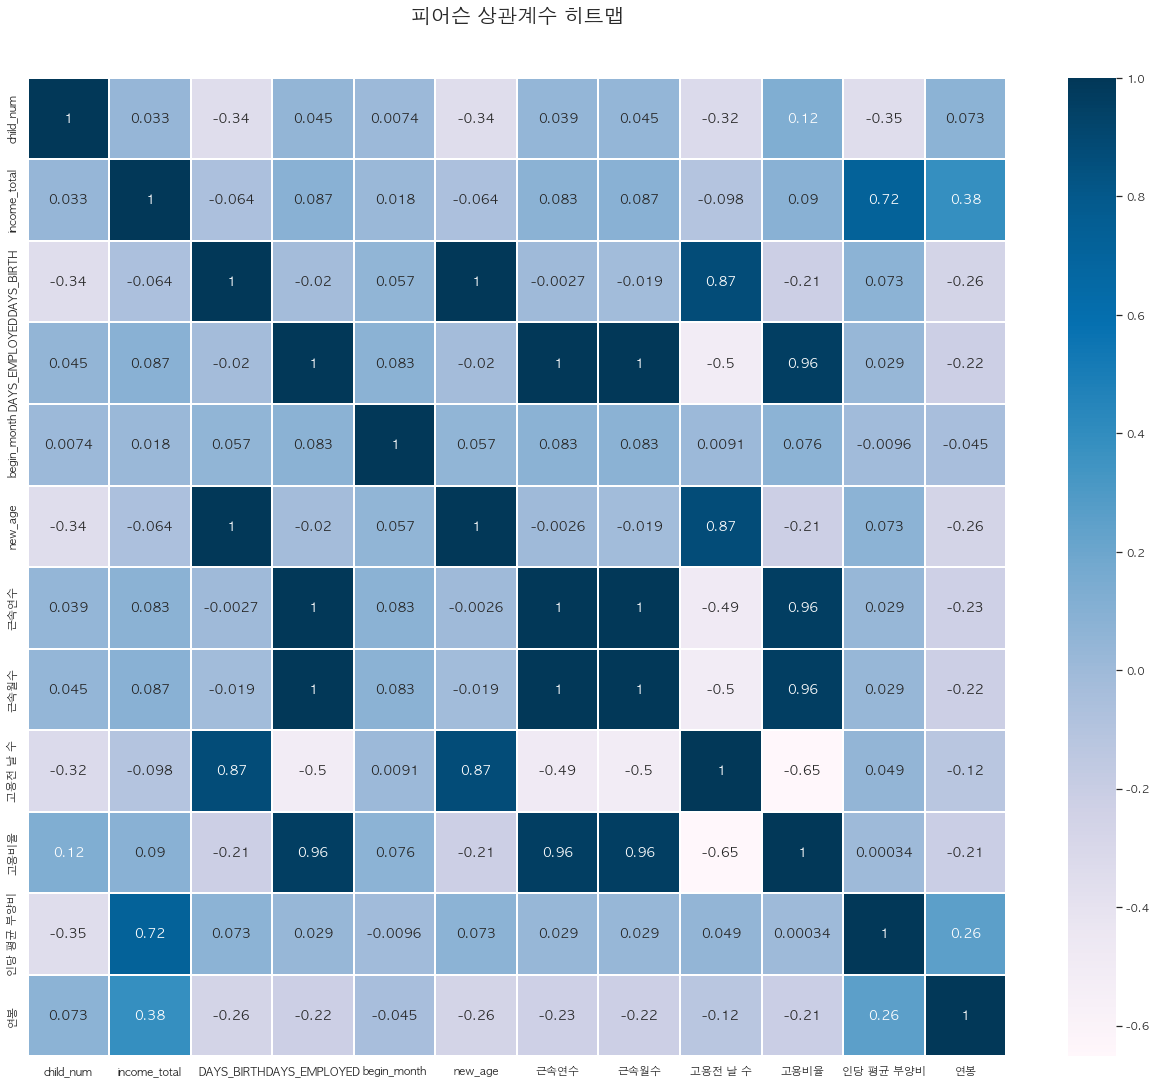

In [12]:
colormap = plt.cm.PuBu
plt.figure(figsize=(22, 18))
plt.title("피어슨 상관계수 히트맵", y = 1.05, size = 20)
sns.heatmap(int_train.corr(), linewidths = 0.1, vmax = 1.0,
           square = True, cmap = colormap, linecolor = "white", annot = True, annot_kws = {"size" : 13})

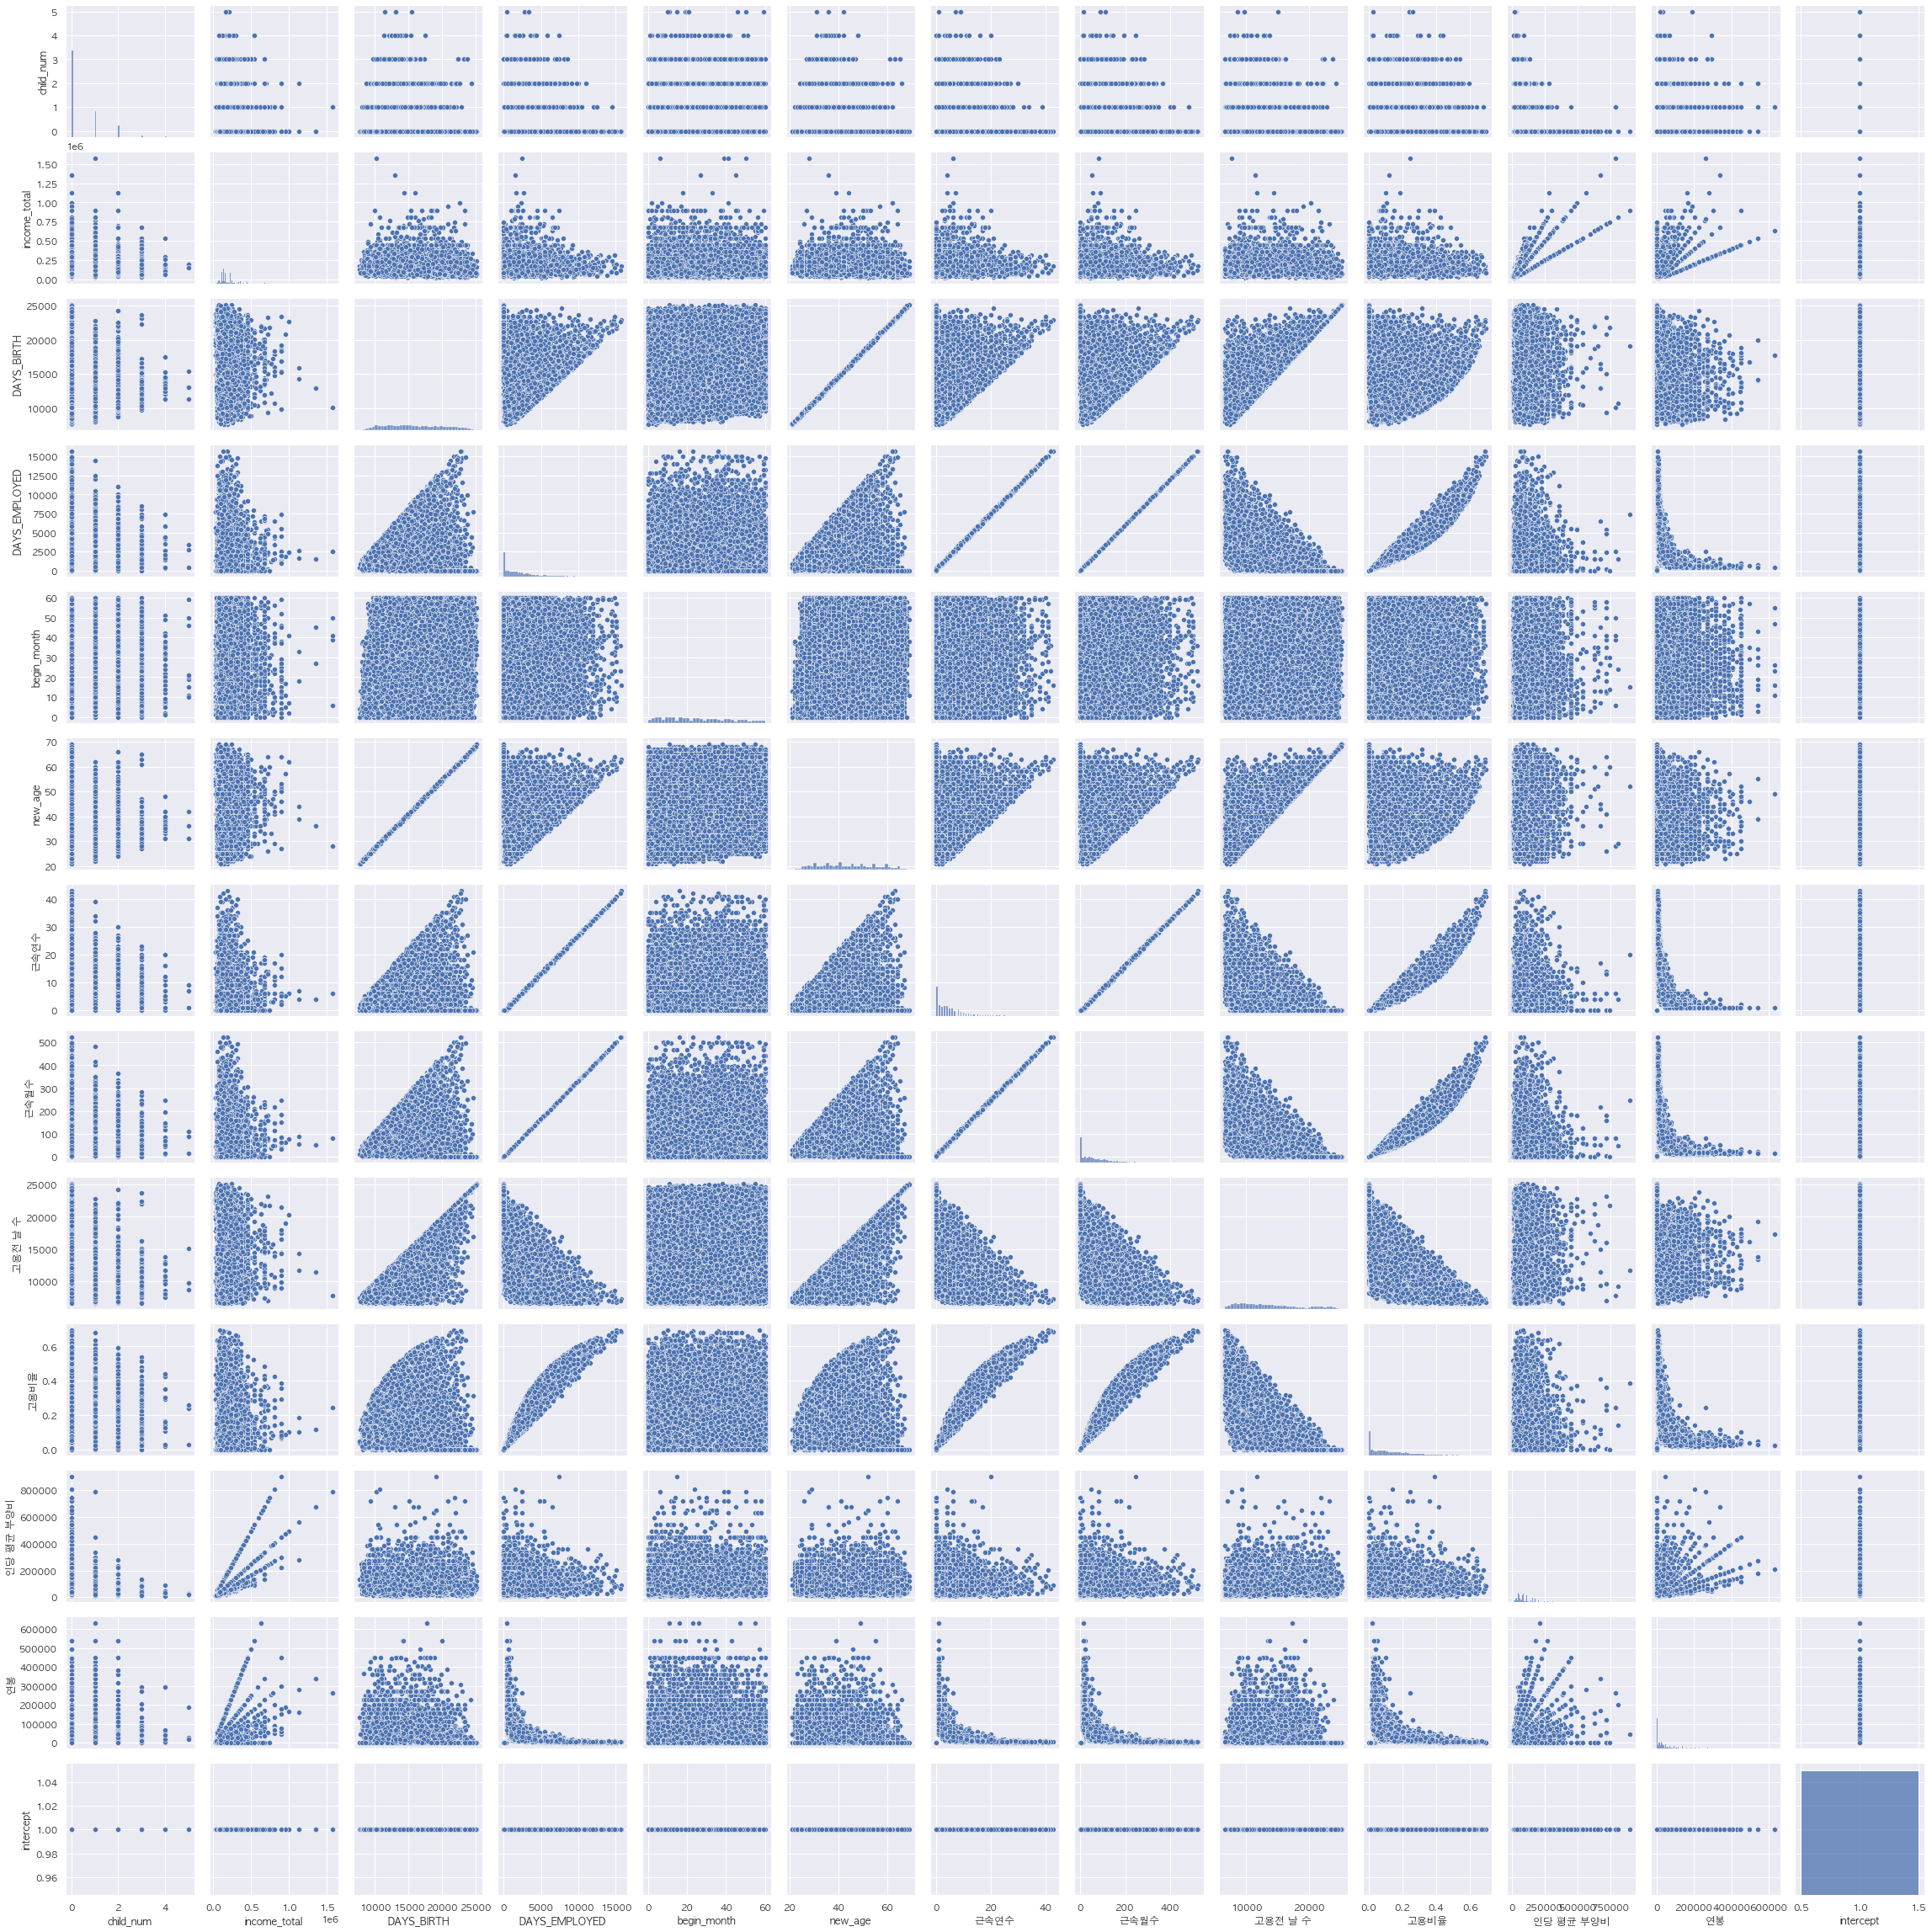

In [ ]:
sns.pairplot(int_train)
plt.show()


In [ ]:
import statsmodels.api as sm
 
int_train['intercept'] = 1
model = sm.OLS(train['credit'], int_train)
results = model.fit()
print(results.summary())


                            OLS Regression Results                            
Dep. Variable:                 credit   R-squared:                       0.023
Model:                            OLS   Adj. R-squared:                  0.022
Method:                 Least Squares   F-statistic:                     55.53
Date:                Sat, 14 Jan 2023   Prob (F-statistic):          1.96e-122
Time:                        17:43:53   Log-Likelihood:                -27883.
No. Observations:               26451   AIC:                         5.579e+04
Df Residuals:                   26439   BIC:                         5.589e+04
Df Model:                          11                                         
Covariance Type:            nonrobust                                         
                    coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------
child_num         0.0105      0.007      1.431

/var/folders/fs/kl20xgn54d3bgs5lpqcv3b_00000gn/T/ipykernel_3565/3432126499.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  int_train['intercept'] = 1


# 여기서부터 PPT 만들 때 참고 To.은비

#### 일단 VIF란? 독립변수 간 상관관계가 크면 추정돤 계수들의 분산은 무조건 커진다.<br>근데 얼마나 커지는지 보는게 바로 VIF 즉 VIF가 크다는 것은 다른 변수들에 의해서 설명되는게 많다는 것이고,<br> 분석을 진행할때 제외되어조 해당 모형은 충분한 설명력을 가질 수 있다는 의미. VIF 값은 보통 0~inf 사이의 값을 가지지만 10 이상이면 다중공선성을 보유하다 판단하고 제거

### 밑에는 일단 단순하게 모든 수치형 변수의 분산팽창요인(VIF)값을 산출하는 간단한 함수.

In [23]:
from statsmodels.stats.outliers_influence import variance_inflation_factor # 분신팽창요인 VIF구하는 클래스 호출

def feature_engineering_XbyVIF(int_train): # VIF 산출하는 함수 작성
    vif = pd.DataFrame() # VIF 값을 담을 데이터 프레임 생성
    vif['VIF_Factor'] = [variance_inflation_factor(int_train.values, i) #VIF 값 산출
                         for i in range(int_train.shape[1])] # 변수 이름
    vif['Feature'] = int_train.columns 
    return vif

feature_engineering_XbyVIF(int_train)

/Users/choejeehyuk/opt/anaconda3/lib/python3.9/site-packages/statsmodels/stats/outliers_influence.py:195: RuntimeWarning: divide by zero encountered in double_scalars
  vif = 1. / (1. - r_squared_i)


,VIF_Factor,Feature
0,1.543528e+00,child_num
1,2.806763e+00,income_total
2,inf,DAYS_BIRTH
3,inf,DAYS_EMPLOYED
4,1.014073e+00,begin_month
5,1.552151e+03,new_age
6,5.269276e+02,근속연수
7,8.005880e+04,근속월수
8,inf,고용전 날 수
9,2.688998e+01,고용비율


In [25]:
vif = vif.sort_values(by='VIF_Factor', ascending=False) # VIF 값 내림차순으로 정렬
vif = vif.reset_index().drop(columns='index')
vif

,VIF_Factor,Feature
0,inf,DAYS_BIRTH
1,inf,DAYS_EMPLOYED
2,inf,고용전 날 수
3,8.005880e+04,근속월수
4,1.552151e+03,new_age
5,5.269276e+02,근속연수
6,6.659122e+01,intercept
7,2.688998e+01,고용비율
8,2.898712e+00,인당 평균 부양비
9,2.806763e+00,income_total


### 근데 단순히 10 이상이라고 다 없애 버리면 결국 변수 자체를 없애 버리는 것이기 때문에 오히려 모델의 정확성이 떨어지는 경우 발생,<br> 때문에 다중공선성이 높은 변수를 하나씩 제거할 떄마다 다시 VIF값을 산출해서 변수를 하나씩 제거하는 방법(필터 메서드)을 통헤 좀 더 정확하게 제거 할 변수를 판별

### 아래는 필터 메서드를 이용해 최종적으로 변수를 선택하는 함수 따라서 총 6개의 수치형 변수가 도출됨

#### 함수 이해 안되면 갠톡해!

In [27]:
def vif(x):
    # vif 10 초과시 drop을 위한 임계값 설정
    thresh = 10
    # Filter method로 feature selection 진행 후 최종 도출 될 데이터 프레임 형성
    output = pd.DataFrame()
    # 데이터의 컬럼 개수 설정
    k = x.shape[1]
    # VIF 측정
    vif = [variance_inflation_factor(x.values, i) for i in range(x.shape[1])]
    for i in range(1,k):
        print(f'{i}번째 VIF 측정')
        # VIF 최대 값 선정
        a = np.argmax(vif) # np.argmax -> 가장 큰 값이 있는 인덱스 값을 반환하는 메서드
        print(f'Max VIF feature & value : {x.columns[a]}, {vif[a]}')
        # VIF 최대 값이 임계치를 넘지 않는 경우 break
        if (vif[a] <= thresh):
            print('\n')
            for q in range(output.shape[1]):
                print(f'{output.columns[q]}의 vif는 {np.round(vif[q],2)}입니다.')
            break
        # VIF 최대 값이 임계치를 넘는 경우, + 1번째 시도인 경우 : if 문으로 해당 feature 제거 후 다시 vif 측정
        if (i == 1):
            output = x.drop(x.columns[a], axis = 1)
            vif = [variance_inflation_factor(output.values, j) for j in range(output.shape[1])]
        # VIF 최대 값이 임계치를 넘는 경우, + 1번째 이후 시도인 경우 : if 문으로 해당 feature 제거 후 다시 vif 측정
        elif (i > 1):
            output = output.drop(output.columns[a], axis = 1)
            vif = [variance_inflation_factor(output.values, j) for j in range(output.shape[1])]
    return(output)

In [28]:
vif(int_train)

/Users/choejeehyuk/opt/anaconda3/lib/python3.9/site-packages/statsmodels/stats/outliers_influence.py:195: RuntimeWarning: divide by zero encountered in double_scalars
  vif = 1. / (1. - r_squared_i)


1번째 VIF 측정
Max VIF feature & value : DAYS_BIRTH, inf
2번째 VIF 측정
Max VIF feature & value : 근속연수, 80058.7980739917
3번째 VIF 측정
Max VIF feature & value : 근속연수, 2084.3821386880277
4번째 VIF 측정
Max VIF feature & value : new_age, 518.2447877525036
5번째 VIF 측정
Max VIF feature & value : 고용전 날 수, 50.999325602834624
6번째 VIF 측정
Max VIF feature & value : new_age, 29.616854435513314
7번째 VIF 측정
Max VIF feature & value : income_total, 12.114627443730756
8번째 VIF 측정
Max VIF feature & value : DAYS_EMPLOYED, 4.987985884139117


child_num의 vif는 1.42입니다.
DAYS_EMPLOYED의 vif는 1.92입니다.
begin_month의 vif는 3.33입니다.
new_age의 vif는 4.99입니다.
인당 평균 부양비의 vif는 3.47입니다.
연봉의 vif는 1.69입니다.


,child_num,DAYS_EMPLOYED,begin_month,new_age,인당 평균 부양비,연봉
0,0,4709,6.0,38,101250.0,16875.0
1,1,1540,5.0,31,82500.0,61875.0
2,0,4434,22.0,52,225000.0,37500.0
3,0,2092,37.0,41,101250.0,40500.0
4,0,2105,26.0,41,78750.0,31500.0
...,...,...,...,...,...,...
26446,2,1984,2.0,33,56250.0,45000.0
26447,1,2475,47.0,42,90000.0,30000.0
26448,0,2015,25.0,28,146250.0,58500.0
26449,0,107,59.0,28,171000.0,0.0


### 아래는 직업 유형이 전체의 몇 퍼센트인지 확인하고 결측값 8000개에서 몇개를 채워줘야 하는지 그냥 비율과 개수 산출한 함수 <br>PPT 만들때는 이렇게 결측값 처리 했고 모델링 진행시 단순히 NaN으로 처리한 것과 이렇게 결측값 처리 한것과 둘다 돌려 본후 모델 성능이 좋은 걸로 결정한다고 언급

In [215]:
def extract_column(x): # 고유값 비울 및 결측값의 비율까지 따지는 코드
    ratio = []
    op = train[x]
    c = op.isnull().sum()
    a = op.dropna().count()
    b = op.value_counts()
    for i, ib in zip(b, b.index):
        print(f'{ib}는 전체의 {round(100*(i / a))}%입니다.')
    print("\n")
    for i, j in zip(b, b.index):
        print(f"{j}는 결측값의 {round(c * (i/a))}개를 차지합니다.")
        ratio.append(round(c * (i/a)))
    return ratio

extract_column('occyp_type')

Laborers는 전체의 25%입니다.
Core staff는 전체의 14%입니다.
Sales staff는 전체의 14%입니다.
Managers는 전체의 12%입니다.
Drivers는 전체의 9%입니다.
High skill tech staff는 전체의 6%입니다.
Accountants는 전체의 5%입니다.
Medicine staff는 전체의 5%입니다.
Cooking staff는 전체의 2%입니다.
Security staff는 전체의 2%입니다.
Cleaning staff는 전체의 2%입니다.
Private service staff는 전체의 1%입니다.
Low-skill Laborers는 전체의 1%입니다.
Waiters/barmen staff는 전체의 1%입니다.
Secretaries는 전체의 1%입니다.
Realty agents는 전체의 0%입니다.
HR staff는 전체의 0%입니다.
IT staff는 전체의 0%입니다.


Laborers는 결측값의 2017개를 차지합니다.
Core staff는 결측값의 1183개를 차지합니다.
Sales staff는 결측값의 1135개를 차지합니다.
Managers는 결측값의 969개를 차지합니다.
Drivers는 결측값의 703개를 차지합니다.
High skill tech staff는 결측값의 465개를 차지합니다.
Accountants는 결측값의 403개를 차지합니다.
Medicine staff는 결측값의 386개를 차지합니다.
Cooking staff는 결측값의 204개를 차지합니다.
Security staff는 결측값의 190개를 차지합니다.
Cleaning staff는 결측값의 179개를 차지합니다.
Private service staff는 결측값의 109개를 차지합니다.
Low-skill Laborers는 결측값의 57개를 차지합니다.
Waiters/barmen staff는 결측값의 55개를 차지합니다.
Secretaries는 결측값의 43개를 차지합니다.
Realty agents는 결측값의 28개를 차지합니

[2017,
 1183,
 1135,
 969,
 703,
 465,
 403,
 386,
 204,
 190,
 179,
 109,
 57,
 55,
 43,
 28,
 28,
 18]